In [1]:
import sys
sys.path.append('PythonExports')
from housing_utilities import retrieve_data, express_as_year
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


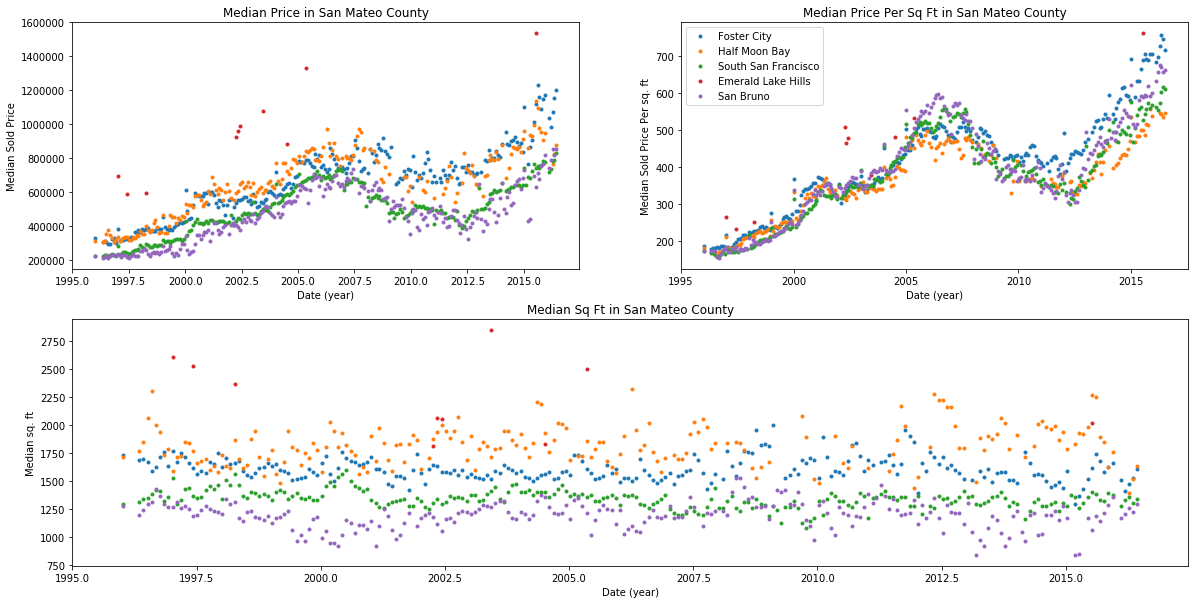

In [2]:
# request = input('What county do you want to compare?\n')
request = 'San Mateo'
lookup = pd.read_csv('CA_lookup.csv')
counties = lookup['County']
# request = counties.sample(n=1).values[0]
county_data = retrieve_data(request)

n_samples = 5
city_sample = pd.Series(county_data['City'].unique()).sample(n=n_samples)
# city_sample = ['San Mateo', 'Foster City', 'Montara','Belmont','San Carlos']

plt.figure(figsize = [20,10])
for city in city_sample:
    data = county_data.where(county_data['City']==city).dropna(how='all') 
    plt.subplot(2,2,1)
    plt.plot(data['Date'].apply(express_as_year),data['MedianSoldPrice_AllHomes'],'.',label=city)
    plt.subplot(2,2,2)
    plt.plot(data['Date'].apply(express_as_year),data['MedianSoldPricePerSqft_AllHomes'],'.',label=city)
    plt.subplot(2,1,2)
    plt.plot(data['Date'].apply(express_as_year),
             data['MedianSoldPrice_AllHomes']/data['MedianSoldPricePerSqft_AllHomes'],'.',label=city)
plt.subplot(2,2,1)
plt.title('Median Price in %s County' % request)
plt.xlabel('Date (year)')
plt.ylabel('Median Sold Price')
plt.subplot(2,2,2)
plt.title('Median Price Per Sq Ft in %s County' % request)
plt.xlabel('Date (year)')
plt.ylabel('Median Sold Price Per sq. ft')
plt.legend()
plt.subplot(2,1,2)
plt.title('Median Sq Ft in %s County' % request)
plt.xlabel('Date (year)')
plt.ylabel('Median sq. ft')
plt.show()

In [3]:
CA = retrieve_data(*counties.tolist())

In [4]:
SoldSize = pd.concat([CA['City'],CA['County'],
                      CA['MedianSoldPrice_AllHomes']/CA['MedianSoldPricePerSqft_AllHomes'],
                     CA['MedianSoldPrice_AllHomes'],
                     CA['MedianSoldPricePerSqft_AllHomes']],axis=1).groupby(['City']).mean().dropna().sort_values(by=0,ascending=False)

SoldSize.rename(columns = {0:'Sq Ft'},inplace =True)
# SoldSize = SoldSize.merge(CA[['County','City']],right_on='City')

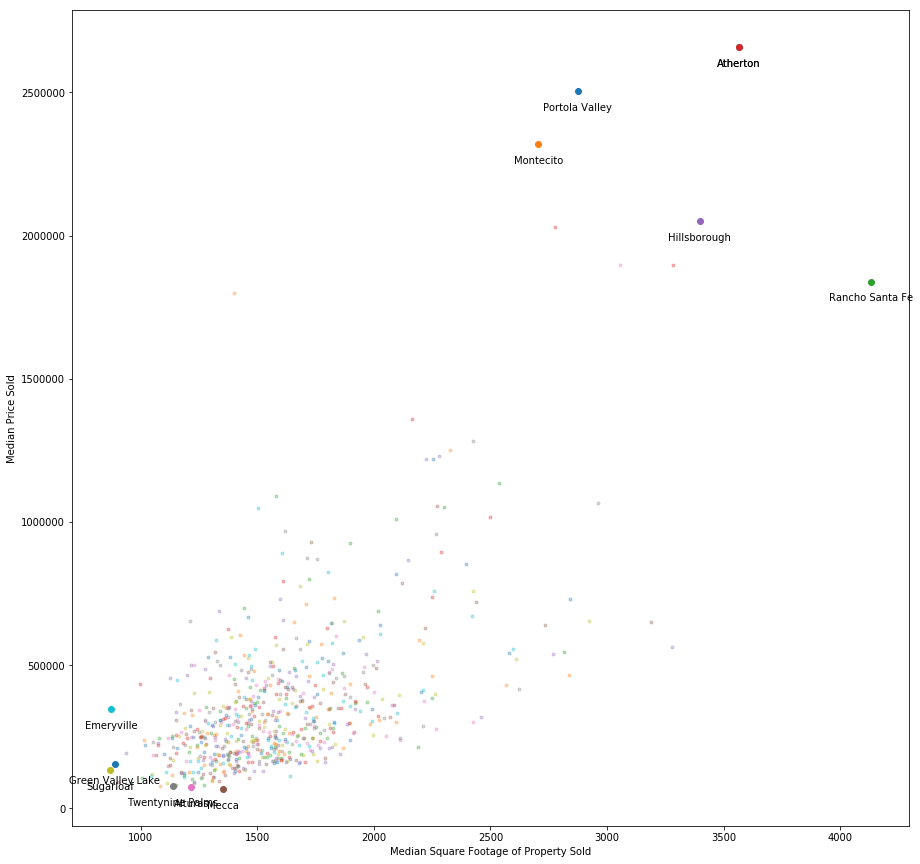

In [5]:
SoldSize.sort_values(by='MedianSoldPrice_AllHomes', ascending=False)
n_superlatives = 3
most_expensive_city = SoldSize.sort_values(by='MedianSoldPrice_AllHomes', ascending=False).index[0:n_superlatives]
least_expensive_city = SoldSize.sort_values(by='MedianSoldPrice_AllHomes', ascending=True).index[0:n_superlatives]
largest_property = SoldSize.sort_values(by='Sq Ft', ascending=False).index[0:n_superlatives]
smallest_property = SoldSize.sort_values(by='Sq Ft', ascending=True).index[0:n_superlatives]

superlatives = [most_expensive_city,largest_property,
                least_expensive_city,smallest_property]

plt.figure(figsize=[15,15])
for city in SoldSize.index:
    sqft = SoldSize.loc[city,'Sq Ft']
    cost = SoldSize.loc[city,'MedianSoldPrice_AllHomes']
    plt.plot(sqft, cost,'.', alpha = 0.3)
for entries in superlatives:
    for city in entries:
        sqft = SoldSize.loc[city,'Sq Ft']
        cost = SoldSize.loc[city,'MedianSoldPrice_AllHomes']
        plt.plot(sqft, cost,'o')
        plt.text(sqft, cost, '\n' + city, horizontalalignment = 'center', verticalalignment = 'top')
# plt.title('Median Size and Price of Properties in CA by County')
plt.xlabel('Median Square Footage of Property Sold')
plt.ylabel('Median Price Sold')
# plt.xlim([500,1500])
# plt.ylim([0,500000])
# plt.savefig('Housing_extremes.png')
plt.show()

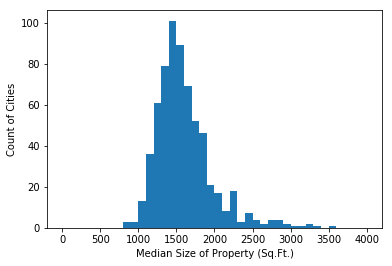

In [6]:
plt.hist(SoldSize['Sq Ft'],np.arange(0,4100,100))
plt.xlabel('Median Size of Property (Sq.Ft.)')
plt.ylabel('Count of Cities')
plt.savefig('MedianSqFt_Distribution.png')
plt.show()

In [7]:
SoldSize.to_csv('CA_city_property_size_price.csv')